![](https://i.pinimg.com/originals/09/53/81/0953813004d675ca814403fbb649f8b7.png)

## Goals
- Create a machine learning algorithm to predict if a patient has diabetes or not  

## Conclusions
- Major Takeaways:
- Final Model Selected:
- Model Metrics:
- Next Steps:

## How to Reproduce:
- [ ] Go over the Readme.md file in the repository of this project [here](https://github.com/ThompsonBethany01/Predicting-Diabetes-Onset).
- [ ] Download Data_Analysis.ipynb and the dataset in your working directory.
- [ ] Run the notebook.

## Thought Process
The predictive variable is the patient being diabetic or not, 0 or 1, making it a classification problem. With a classification problem:
- we create algorithms based on the labeled outcome variable
- this produces a decision rule to classify future data with
- we generalize the trends/patterns in the data to predict the future/unseen data

# Table of Contents <a class="anchor" id="top"></a>
1. [Acquire](#acquire)
2. [Prepare](#prepare)
3. [Explore](#explore)
4. [Modeling](#model)
5. [Final Conclusions](#fin)

In [1]:
# initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#import modules
import Prepare
# import Model

# Acquire <a class="anchor" id="acquire"></a>
Dataset from UCI Machine Learning via Kaggle [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database) saved in .csv file  
#### Steps:
- read csv file into df
- summarize data
- create data dictionary

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


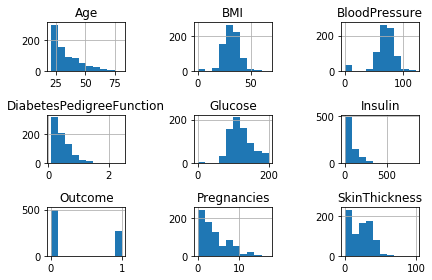

In [7]:
df.hist()
plt.tight_layout()

In [8]:
#for column in df.columns:
#    print(column)
#    print(df[column].value_counts())
#    print('')

### Takeaways
768 observations  
- 8 columns and 1 predictive column as diabetic or not  

All numeric values, integers or floats  
- average diabetic diagnosis is 0, non-diabetic  
- all continuous features except pregnancies and outcome which are discrete  

No null values  
- observations with 0 for values that cannot be, such as BMI and Blood Pressure, have 0 for multiple features  
    - could be null values that were replaced with 0

[Table of Contents](#top)

# Prepare <a class="anchor" id="prepare"></a>
For Exploration:
- create new features by bining demographics 
    - age into 20s, 30s, etc
    - bmi into low, middle, high
    - blood pressure into low, good, high

For Modeling:
- scale the data
- determine if outliers/anomalies to remove
- split into train, valideate, test
- create features based on clustering

In [9]:
df = Prepare.prep_df(df)

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins,bmi_bins,bp_bins,high_bmi_bp
0,6,148.0,72,35,0,33.6,0.627,50,1,4,2,2,True
1,1,85.0,66,29,0,26.6,0.351,31,0,3,1,1,False
2,8,183.0,64,0,0,23.3,0.672,32,1,3,1,1,False
3,1,89.0,66,23,94,28.1,0.167,21,0,1,1,1,False
4,0,137.0,40,35,168,43.1,2.288,33,1,3,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180,32.9,0.171,63,0,4,2,2,True
764,2,122.0,70,27,0,36.8,0.340,27,0,2,3,2,False
765,5,121.0,72,23,112,26.2,0.245,30,0,3,1,2,False
766,1,126.0,60,0,0,30.1,0.349,47,1,4,2,1,True


### Values with 0
- remove rows with 4 0's
- imputing with mean for observations with only 1 or 2 0's

### Splitting Data
- 70% train
- 20% validate
- 10% test

In [11]:
train, validate, test = Prepare.split_df(df)

train shape:  (538, 13) , validate shape:  (153, 13) , test shape:  (77, 13)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


In [12]:
train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins,bmi_bins,bp_bins,high_bmi_bp
279,2,108.0,62,10,278,25.3,0.881,22,0,1,1,1,False
614,11,138.0,74,26,144,36.1,0.557,50,1,4,3,2,False
740,11,120.0,80,37,150,42.3,0.785,48,1,4,3,3,True
113,4,76.0,62,0,0,34.0,0.391,25,0,2,2,1,True
405,2,123.0,48,32,165,42.1,0.520,26,0,2,3,1,False


### Scaling the Data Using Min-Max Scaler
- transforms the range of data points to 0 - 1

In [13]:
X_train_scaled, X_validate_scaled, X_test_scaled = Prepare.scale_dfs(train, validate, test, 'Outcome')

In [14]:
X_train_scaled.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,age_bins,bmi_bins,bp_bins,high_bmi_bp
279,0.117647,0.412903,0.508197,0.101010,0.328605,0.172330,0.340899,0.019608,0.000000,0.0,0.0,0.0
614,0.647059,0.606452,0.606557,0.262626,0.170213,0.434466,0.202141,0.568627,1.000000,1.0,0.5,0.0
740,0.647059,0.490323,0.655738,0.373737,0.177305,0.584951,0.299786,0.529412,1.000000,1.0,1.0,1.0
113,0.235294,0.206452,0.508197,0.000000,0.000000,0.383495,0.131049,0.078431,0.333333,0.5,0.0,1.0
405,0.117647,0.509677,0.393443,0.323232,0.195035,0.580097,0.186296,0.098039,0.333333,1.0,0.0,0.0


### Creating Clusters on Scaled Data
- age and bmi bins to create one cluster

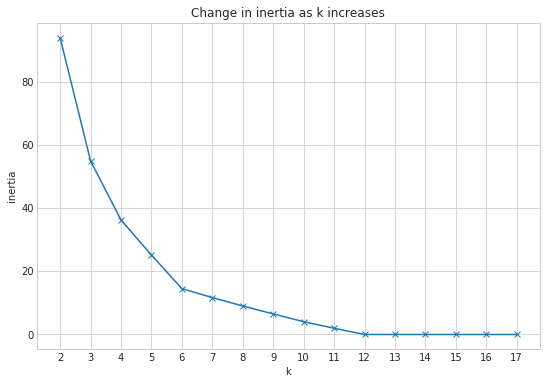

In [15]:
from sklearn.cluster import KMeans

# features to predict cluster on, only fitting model on X(train)
X = X_train_scaled[['age_bins','bmi_bins']]
Y = X_validate_scaled[['age_bins','bmi_bins']]
Z = X_test_scaled[['age_bins','bmi_bins']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# will start with 4 clusters

In [16]:
features = ['age_bins','bmi_bins']
columns = ['age_bmi_cluster1','age_bmi_cluster2','age_bmi_cluster3','age_bmi_cluster4']
n = 4
cluster = 'age_bmi_cluster'

X_train_scaled, X_validate_scaled, X_test_scaled, train, validate, test = Prepare.create_clusters(X_train_scaled, X_validate_scaled, X_test_scaled, train, validate, test, features, n, columns, cluster)

### Pregnancy Cluster
- using modeling to bin the feature

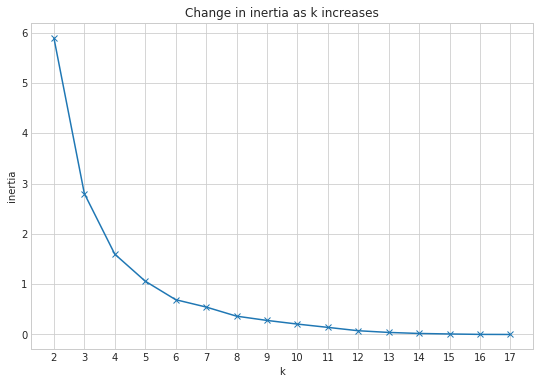

In [17]:
from sklearn.cluster import KMeans

# features to predict cluster on, only fitting model on X(train)
X = X_train_scaled[['Pregnancies']]
Y = X_validate_scaled[['Pregnancies']]
Z = X_test_scaled[['Pregnancies']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# will start with 4 clusters

In [18]:
features = ['Pregnancies']
columns = ['pregnancy_cluster1','pregnancy_cluster2','pregnancy_cluster3','pregnancy_cluster4']
n = 4
cluster = 'pregnancy_cluster'

X_train_scaled, X_validate_scaled, X_test_scaled, train, validate, test = Prepare.create_clusters(X_train_scaled, X_validate_scaled, X_test_scaled, train, validate, test, features, n, columns, cluster)

## Cluster on Insulin and Glucose

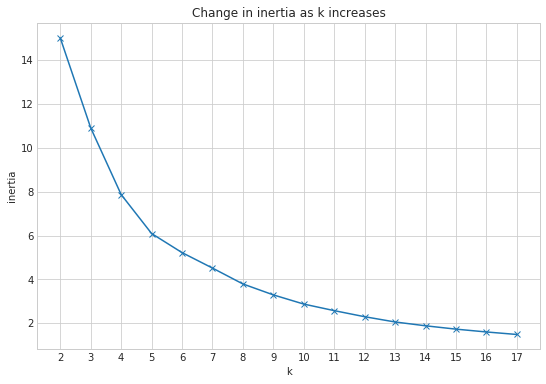

In [19]:
from sklearn.cluster import KMeans

# features to predict cluster on, only fitting model on X(train)
X = X_train_scaled[['Insulin','Glucose']]
Y = X_validate_scaled[['Insulin','Glucose']]
Z = X_test_scaled[['Insulin','Glucose']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# will start with 5 clusters

In [20]:
features = ['Insulin','Glucose']
columns = ['insulin_glucose_cluster1','insulin_glucose_cluster2','insulin_glucose_cluster3','insulin_glucose_cluster4','insulin_glucose_cluster5']
n = 5
cluster = 'insulin_glucose_cluster'

X_train_scaled, X_validate_scaled, X_test_scaled, train, validate, test = Prepare.create_clusters(X_train_scaled, X_validate_scaled, X_test_scaled, train, validate, test, features, n, columns, cluster)

In [21]:
X_train_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,age_bins,bmi_bins,...,pregnancy_cluster1,pregnancy_cluster2,pregnancy_cluster3,pregnancy_cluster4,insulin_glucose_cluster,insulin_glucose_cluster1,insulin_glucose_cluster2,insulin_glucose_cluster3,insulin_glucose_cluster4,insulin_glucose_cluster5
279,0.117647,0.412903,0.508197,0.101010,0.328605,0.172330,0.340899,0.019608,0.000000,0.0,...,0,1,0,0,2,0,0,1,0,0
614,0.647059,0.606452,0.606557,0.262626,0.170213,0.434466,0.202141,0.568627,1.000000,1.0,...,0,0,1,0,2,0,0,1,0,0
740,0.647059,0.490323,0.655738,0.373737,0.177305,0.584951,0.299786,0.529412,1.000000,1.0,...,0,0,1,0,2,0,0,1,0,0
113,0.235294,0.206452,0.508197,0.000000,0.000000,0.383495,0.131049,0.078431,0.333333,0.5,...,0,0,0,1,4,0,0,0,0,1
405,0.117647,0.509677,0.393443,0.323232,0.195035,0.580097,0.186296,0.098039,0.333333,1.0,...,0,1,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.000000,0.387097,0.524590,0.373737,0.075650,0.373786,0.182013,0.019608,0.000000,0.5,...,0,1,0,0,4,0,0,0,0,1
683,0.235294,0.522581,0.655738,0.000000,0.000000,0.342233,0.193148,0.117647,0.333333,0.5,...,0,0,0,1,0,1,0,0,0,0
624,0.117647,0.412903,0.524590,0.000000,0.000000,0.305825,0.031263,0.000000,0.000000,0.5,...,0,1,0,0,0,1,0,0,0,0
453,0.117647,0.483871,0.000000,0.000000,0.000000,0.033981,0.319914,1.000000,1.000000,0.0,...,0,1,0,0,0,1,0,0,0,0


### Takeaways
- removed observations that had 0 for BMI and BP, these observations had other 0 values as well and were note useful for exploration and modeling
- added new features based on binning continuous features

### Next Steps
- deal with observations that are 0 which cannot be 0, such as glucose and BMI
- create clusters
- scale the data for modeling
- put work into a prepare.py module and clean up the code in the notebook

[Table of Contents](#top)

# Explore <a class="anchor" id="explore"></a>
- determine trends in patient being diabetic or not
- test the significance with hypothesis testing
- explore interaction of independent features to determine what clusters to create

Text(0, 0.5, 'Count of Patients')

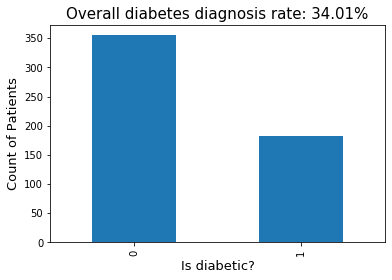

In [22]:
train.Outcome.value_counts().sort_index().plot.bar()
diabetic_rate = train.Outcome.mean()
plt.title(f"Overall diabetes diagnosis rate: {diabetic_rate:.2%}", size=15)
plt.xlabel('Is diabetic?', size=13)
plt.ylabel('Count of Patients', size=13)

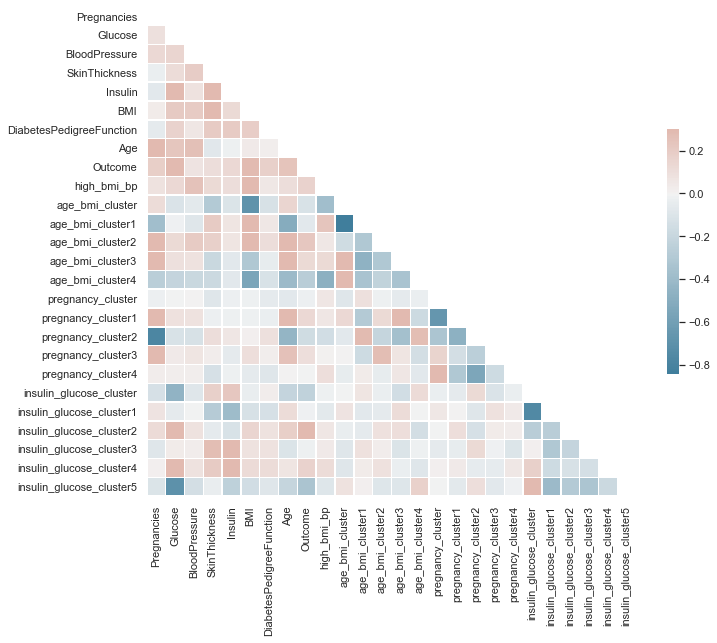

In [23]:
corr = train.corr()

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Looking at Independent Features vs. Diabetic Outcome

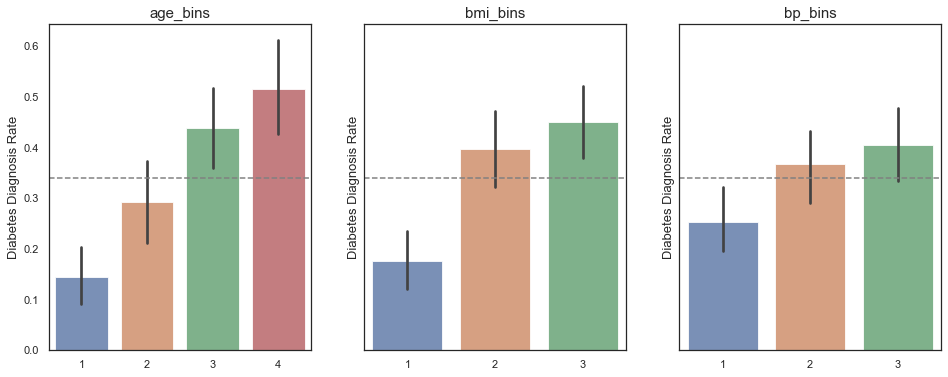

In [24]:
# categorical features we can compare
features = ['age_bins', 'bmi_bins', 'bp_bins']

# overall diagnosis of diabetes on whole train df
diabetic_rate = train.Outcome.mean()

# plotting subgroups diagnosis rate and comparing to overal with dashed line
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'Outcome', data=train, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Diabetes Diagnosis Rate', size=13)
    ax[i].set_title(feature, size=15)
    ax[i].axhline(diabetic_rate, ls='--', color='grey')

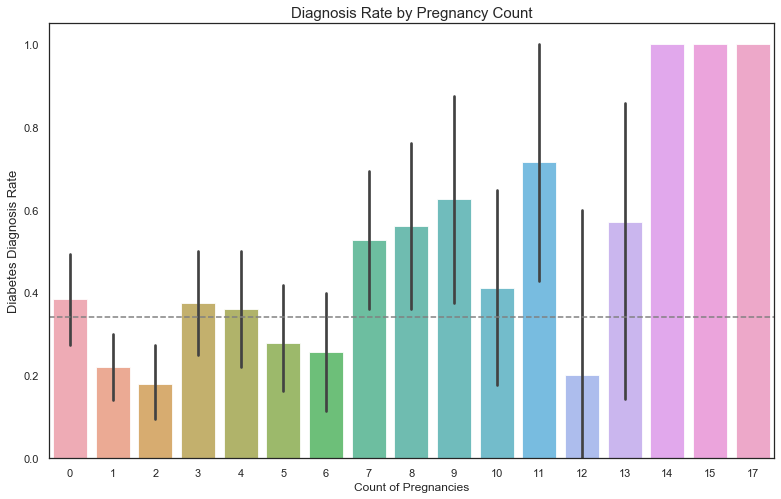

In [25]:
# overall diagnosis of diabetes on whole train df
diabetic_rate = train.Outcome.mean()

plt.figure(figsize=(13,8))

# plotting pregnancy count diagnosis rate and comparing to overall with dashed line
sns.barplot('Pregnancies', 'Outcome', data=train, alpha=.8)
plt.xlabel('Count of Pregnancies')
plt.ylabel('Diabetes Diagnosis Rate', size=13)
plt.title('Diagnosis Rate by Pregnancy Count', size=15)
plt.axhline(diabetic_rate, ls='--', color='grey')

In [26]:
# note the few amount of pregnancies at 10 and higher
train[train.Outcome == 1].Pregnancies.value_counts()

0     28
1     22
7     19
3     18
4     18
8     14
2     13
5     12
9     10
6      9
10     7
11     5
13     4
15     1
12     1
14     1
17     1
Name: Pregnancies, dtype: int64

Text(0.5, 1.0, 'Diabetes Diagnosis by Pregnancy Count and Glucose')

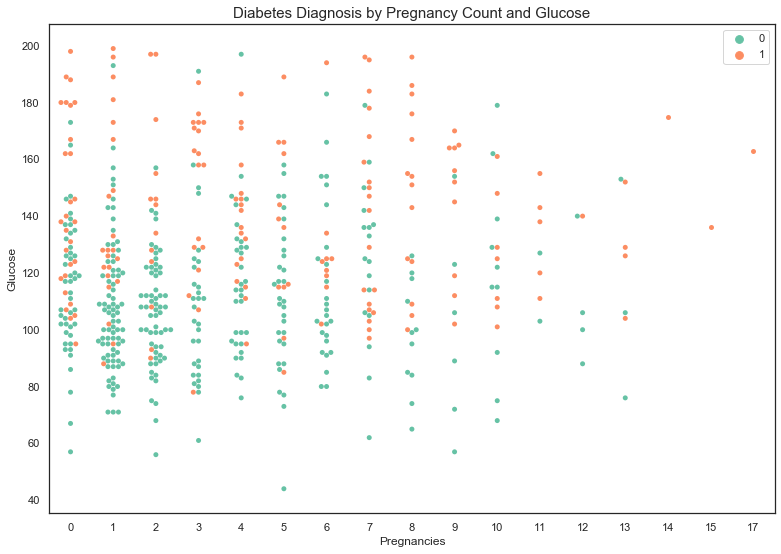

In [27]:
plt.figure(figsize=(13,9))
sns.swarmplot(x="Pregnancies", y="Glucose", data=train, hue="Outcome", palette="Set2")
plt.legend()
plt.title('Diabetes Diagnosis by Pregnancy Count and Glucose', size=15)

Text(0.5, 1.0, 'Diabetes Diagnosis by Age and BMI Bins')

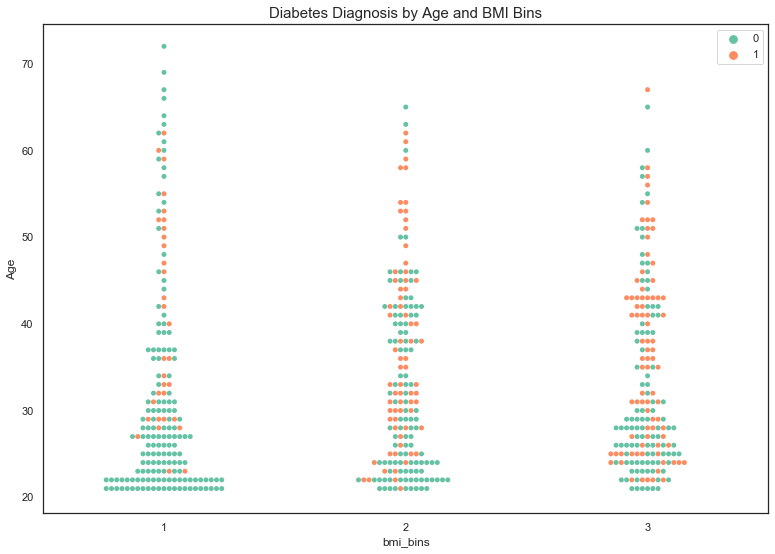

In [28]:
plt.figure(figsize=(13,9))
sns.swarmplot(x="bmi_bins", y="Age", data=train, hue="Outcome", palette="Set2")
plt.legend()
plt.title('Diabetes Diagnosis by Age and BMI Bins', size=15)

Text(0.5, 1, 'Diabetes Diagnosis with BMI vs. Glucose')

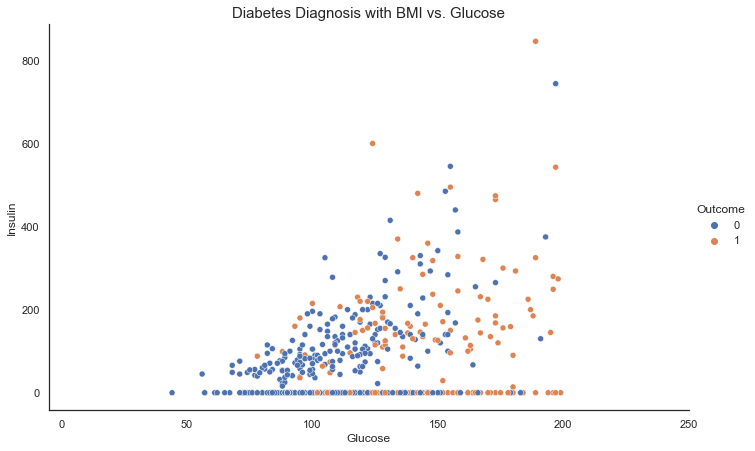

In [29]:
sns.relplot(x="Glucose", y="Insulin", hue="Outcome", data=train, height=6, aspect=1.6)
plt.xlim(-5, 250)
plt.title('Diabetes Diagnosis with BMI vs. Glucose', size=15)

### Exploring Interaction of X Variables

In [30]:
X_train_scaled.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'age_bins', 'bmi_bins',
       'bp_bins', 'high_bmi_bp', 'age_bmi_cluster', 'age_bmi_cluster1',
       'age_bmi_cluster2', 'age_bmi_cluster3', 'age_bmi_cluster4',
       'pregnancy_cluster', 'pregnancy_cluster1', 'pregnancy_cluster2',
       'pregnancy_cluster3', 'pregnancy_cluster4', 'insulin_glucose_cluster',
       'insulin_glucose_cluster1', 'insulin_glucose_cluster2',
       'insulin_glucose_cluster3', 'insulin_glucose_cluster4',
       'insulin_glucose_cluster5'],
      dtype='object')

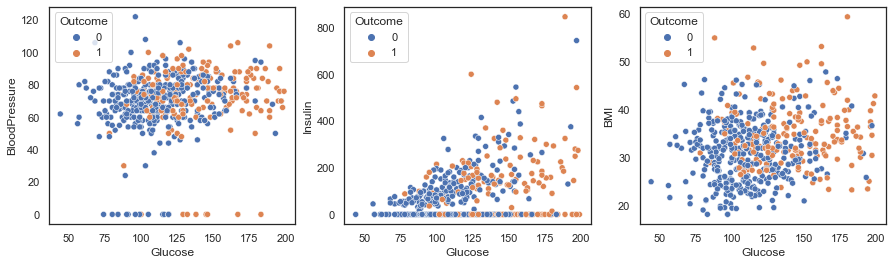

In [31]:
plt.figure(figsize=(15,4))

plt.subplot(131)
sns.scatterplot(x=train.Glucose, y=train.BloodPressure, hue=train.Outcome)

plt.subplot(132)
sns.scatterplot(x=train.Glucose, y=train.Insulin, hue=train.Outcome)

plt.subplot(133)
sns.scatterplot(x=train.Glucose, y=train.BMI, hue=train.Outcome)

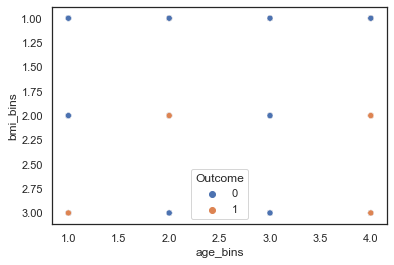

In [32]:
sns.scatterplot(x=train.age_bins, y=train.bmi_bins, hue=train.Outcome)

## Exploring Clusters
- is there significant difference between the individual cluster groups?
- visually and with statistical testing

#### Clusters to Test
- age_bmi_cluster
- pregnancy_cluster

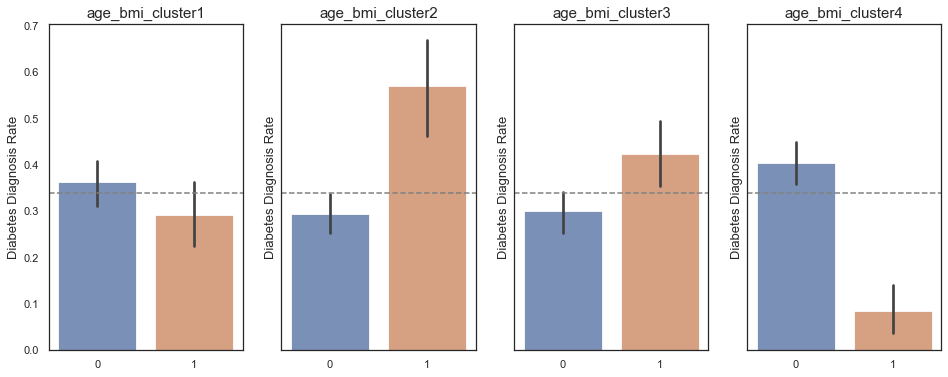

In [33]:
# comparing the dummy variables created from the age_bmi_cluster
features = ['age_bmi_cluster1', 'age_bmi_cluster2', 'age_bmi_cluster3','age_bmi_cluster4']

# overall diagnosis of diabetes on whole train df
diabetic_rate = train.Outcome.mean()

# plotting subgroups diagnosis rate and comparing to overal with dashed line
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'Outcome', data=train, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Diabetes Diagnosis Rate', size=13)
    ax[i].set_title(feature, size=15)
    ax[i].axhline(diabetic_rate, ls='--', color='grey')

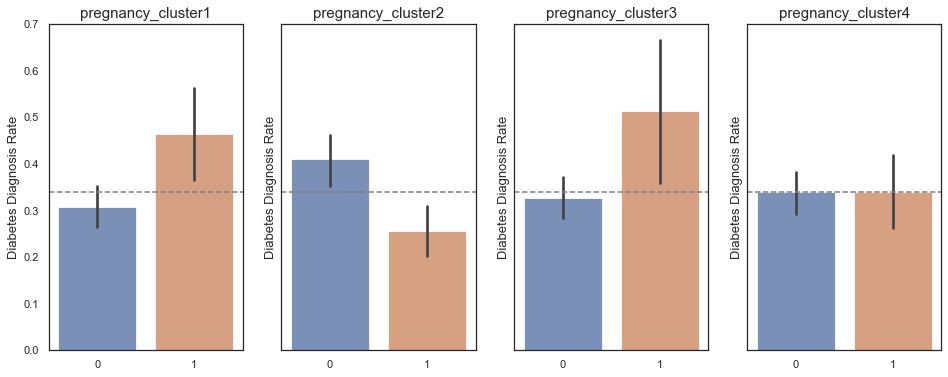

In [34]:
# comparing the dummy variables created from the age_bmi_cluster
features = ['pregnancy_cluster1', 'pregnancy_cluster2', 'pregnancy_cluster3','pregnancy_cluster4']

# overall diagnosis of diabetes on whole train df
diabetic_rate = train.Outcome.mean()

# plotting subgroups diagnosis rate and comparing to overal with dashed line
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'Outcome', data=train, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Diabetes Diagnosis Rate', size=13)
    ax[i].set_title(feature, size=15)
    ax[i].axhline(diabetic_rate, ls='--', color='grey')

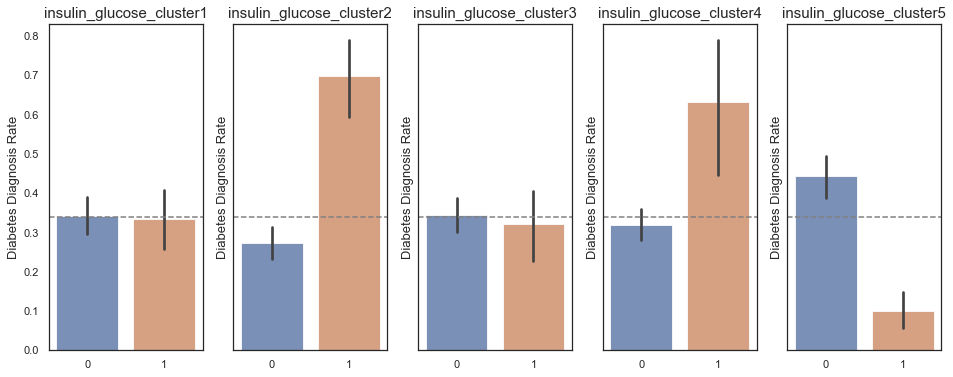

In [35]:
# comparing the dummy variables created from the age_bmi_cluster
features = ['insulin_glucose_cluster1', 'insulin_glucose_cluster2', 'insulin_glucose_cluster3','insulin_glucose_cluster4','insulin_glucose_cluster5']

# overall diagnosis of diabetes on whole train df
diabetic_rate = train.Outcome.mean()

# plotting subgroups diagnosis rate and comparing to overal with dashed line
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'Outcome', data=train, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Diabetes Diagnosis Rate', size=13)
    ax[i].set_title(feature, size=15)
    ax[i].axhline(diabetic_rate, ls='--', color='grey')

### Takeaways


### Next Steps
- create clusters for new features based on BMI, age, etc.
- bin more continuous variables

[Table of Contents](#top)

# Modeling <a class="anchor" id="model"></a>
##### Outcome of patient being diabetic or not is the predictive feature, Y
#### Steps
1. Create the Baseline model for comparison based on most common diagnosis
2. Create models fit to the train df only
3. Validate on top 3 models, tuning hyperparameters
4. Use final top model evaluated on test
5. Determine next steps/conclusions

### Baseline

In [36]:
train.Outcome.value_counts()

0    355
1    183
Name: Outcome, dtype: int64

Text(0, 0.5, 'Count of Patients')

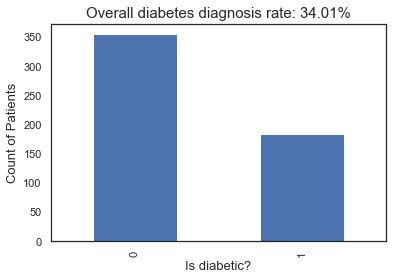

In [37]:
# taking a look at the same barplot again, overall rate of diabetes diagnosis
train.Outcome.value_counts().sort_index().plot.bar()
diabetic_rate = train.Outcome.mean()
plt.title(f"Overall diabetes diagnosis rate: {diabetic_rate:.2%}", size=15)
plt.xlabel('Is diabetic?', size=13)
plt.ylabel('Count of Patients', size=13)

In [38]:
y_train = train[['Outcome']]

In [39]:
# most common diagnosis is non-diabetic, this will be our baseline
y_train['baseline_prediction'] = 0

baseline_accuracy = (y_train.baseline_prediction == train.Outcome).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 65.99%


## Creating Classification Models
#### Models to Create
- LogisticRegression
- DecisionTree
- RandomForest
- KNN

#### Primary Evaluation Metric
Is it more dangerous to predict diabetic when actually not, or not diabetic when actually diabetic? 
   - It is better to predict Diabetic because a patient not being diagnosed could lead to harm to the patient
   - We want the model to predict 1 better, aka have a higher recall score and precision
       - recall: 
       - TP / (TP + FN)
       - % of acually positive cases that were predicted as positive
       - Optimize for recall when missing actual positive cases is expensive or deadly

In [40]:
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

# SelectKBest features
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
# splitting into X and y
X_train = X_train_scaled
y_train = y_train[['Outcome']]

## Creating Models on Train
- What features are most important in the model?

In [42]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features to select
rfe = RFE(lm, 12)

# fit the data using RFE
rfe.fit(X_train_scaled,y_train.Outcome)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [43]:
# Features elected by SelectKBest
print('SelectKBest Top 12 Features:')
rfe_feature

SelectKBest Top 12 Features:


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'age_bins',
 'bp_bins',
 'high_bmi_bp',
 'age_bmi_cluster4']

In [44]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'age_bins',
       'bmi_bins', 'bp_bins', 'high_bmi_bp', 'age_bmi_cluster',
       'age_bmi_cluster1', 'age_bmi_cluster2', 'age_bmi_cluster3',
       'age_bmi_cluster4', 'pregnancy_cluster', 'pregnancy_cluster1',
       'pregnancy_cluster2', 'pregnancy_cluster3', 'pregnancy_cluster4',
       'insulin_glucose_cluster', 'insulin_glucose_cluster1',
       'insulin_glucose_cluster2', 'insulin_glucose_cluster3',
       'insulin_glucose_cluster4', 'insulin_glucose_cluster5'],
      dtype='object')

In [45]:
# 10 features have the same rank of 1
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  5, 15, 17,  6,  1,
       11, 14, 16, 12, 10,  7,  9,  8,  3, 13,  4])

In [46]:
# Features we will model on
X_train = X_train_scaled[['Glucose','BMI','Age','age_bins','age_bmi_cluster1','age_bmi_cluster2','age_bmi_cluster3','age_bmi_cluster4','pregnancy_cluster2','pregnancy_cluster3','pregnancy_cluster4']]
y_train = y_train[['Outcome']]

### Logistic Regression Model

In [47]:
# create model object
logit = LogisticRegression(C=10)

# fit to train
logit.fit(X_train, y_train)

# predict on train
y_pred = logit.predict(X_train)

#evaluate
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.78


In [48]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 5.45767003  3.31950349 -2.50322053  2.68602022  0.06395541 -0.06560328
   0.17743573 -0.17262803 -0.23894307 -0.03892289 -0.15482126]]
Intercept: 
 [-5.35833563]


In [49]:
print(confusion_matrix(y_train, y_pred))

[[317  38]
 [ 82 101]]


In [50]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       355
           1       0.73      0.55      0.63       183

    accuracy                           0.78       538
   macro avg       0.76      0.72      0.73       538
weighted avg       0.77      0.78      0.77       538



## Decision Tree Model

In [91]:
# create the model
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

# fit to train
clf.fit(X_train, y_train)

# predict on train
y_pred = clf.predict(X_train)

# evaluate
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


In [92]:
confusion_matrix(y_train, y_pred)

array([[290,  65],
       [ 36, 147]])

In [93]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       355
           1       0.69      0.80      0.74       183

    accuracy                           0.81       538
   macro avg       0.79      0.81      0.80       538
weighted avg       0.82      0.81      0.82       538



## Random Forest Model

In [90]:
# create the model
rf = RandomForestClassifier(max_depth=5, random_state=123)

# fit to train
rf.fit(X_train, y_train)

# predict on train
y_pred = rf.predict(X_train)

# evaluate
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.84


In [55]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       355
           1       0.81      0.67      0.74       183

    accuracy                           0.84       538
   macro avg       0.83      0.80      0.81       538
weighted avg       0.83      0.84      0.83       538



In [56]:
print(rf.feature_importances_)

[0.44166254 0.18741941 0.16806315 0.07308013 0.00835172 0.02314341
 0.01221923 0.04317174 0.01715477 0.00655002 0.01918387]


## KNN Model

In [57]:
# crate the model
knn = KNeighborsClassifier(n_neighbors=5)

# fit to train
knn.fit(X_train, y_train)

# predict on train
y_pred = knn.predict(X_train)

# evaluate
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.85


In [58]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       355
           1       0.77      0.77      0.77       183

    accuracy                           0.85       538
   macro avg       0.83      0.83      0.83       538
weighted avg       0.85      0.85      0.85       538



## RidgeClassifier Model

In [59]:
# create the model object
clf2 = RidgeClassifier()

# fit to train only
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_train)

# evaluate with score, returns the mean accuracy on the given test data and labels
print('Accuracy of Ridge classifier on training set:', round(clf.score(X_train, y_train),2))

Accuracy of Ridge classifier on training set: 0.77


In [60]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       355
           1       0.72      0.54      0.62       183

    accuracy                           0.77       538
   macro avg       0.76      0.72      0.73       538
weighted avg       0.77      0.77      0.76       538



## SGDClassifier Model

In [61]:
clf3 = SGDClassifier(max_iter=1000, tol=1e-3)

clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_train)

print('Accuracy of SGD classifier on training set:', round(clf3.score(X_train, y_train),2))

Accuracy of SGD classifier on training set: 0.74


In [62]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       355
           1       0.77      0.33      0.46       183

    accuracy                           0.74       538
   macro avg       0.75      0.64      0.64       538
weighted avg       0.75      0.74      0.70       538



## Evaluating Top 3 on Validate - Tuning Hyperparameters
1. RandomForest Model at .86 accuracy, .77 recall
2. DecisionTree at .85 accuracy, .77 recall
3. KNN at .82 accuracy, .72 recall

In [63]:
# splitting into X and y
X_validate = X_validate_scaled[['Glucose','BMI','Age','age_bins','age_bmi_cluster1','age_bmi_cluster2','age_bmi_cluster3','age_bmi_cluster4','pregnancy_cluster2','pregnancy_cluster3','pregnancy_cluster4']]
y_validate = validate[['Outcome']]

### RandomForest on Validate

In [64]:
# predict on validate
y_pred = rf.predict(X_validate)

# evaluate
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.80


In [65]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        98
           1       0.77      0.62      0.69        55

    accuracy                           0.80       153
   macro avg       0.79      0.76      0.77       153
weighted avg       0.79      0.80      0.79       153



### DecisionTree on Validate

In [94]:
# predict on validate
y_pred = clf.predict(X_validate)

# evaluate
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.77


In [95]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        98
           1       0.66      0.76      0.71        55

    accuracy                           0.77       153
   macro avg       0.76      0.77      0.76       153
weighted avg       0.78      0.77      0.77       153



### KNN on Validate

In [68]:
# predict on train
y_pred = knn.predict(X_validate)

# evaluate
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.72


In [69]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        98
           1       0.63      0.53      0.57        55

    accuracy                           0.72       153
   macro avg       0.69      0.68      0.68       153
weighted avg       0.71      0.72      0.71       153



## Evaluating Top Model on Test - Determine if Overfit
- RandomForest did better on recall

In [70]:
# splitting into X and y
X_test = X_test_scaled[['Glucose','BMI','Age','age_bins','age_bmi_cluster1','age_bmi_cluster2','age_bmi_cluster3','age_bmi_cluster4','pregnancy_cluster2','pregnancy_cluster3','pregnancy_cluster4']]
y_test = test[['Outcome']]

In [71]:
# predict on validate
y_pred = rf.predict(X_test)

# evaluate
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.74


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        47
           1       0.73      0.53      0.62        30

    accuracy                           0.74        77
   macro avg       0.74      0.70      0.71        77
weighted avg       0.74      0.74      0.73        77



## Visualizing Final Model with Train, Validate, and Test

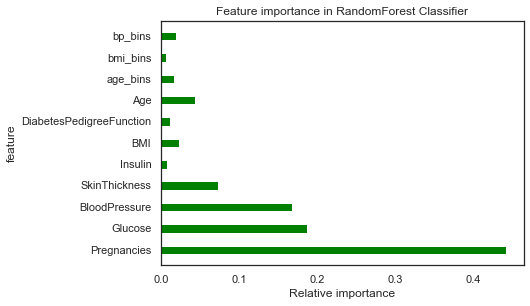

<Figure size 360x360 with 0 Axes>

In [109]:
col = X_train_scaled.columns

#modelname.feature_importance_
y = rf.feature_importances_

#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

## Takeaways
- initial modeling is already outperforming the baseline
- try hyperparamters after scaling
- creating clusters as new features could improve the model

[Table of Contents](#top)

# Conclusions <a class="anchor" id="fin"></a>
- final model outperforms baseline
- cluster created was not significant

## Next Steps
- hypothesis testing
- create new clusters
- create new features if any
- visualize clusters
- clean up notebook with .py modules for wrangle and model

[Table of Contents](#top)